In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data1.csv")
df.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [3]:
df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]

In [4]:
y = df["class"].values

In [5]:
x_data = df.drop(["class"],axis=1)
X = (x_data - np.min(x_data)) // (np.max(x_data)-np.min(x_data))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [8]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

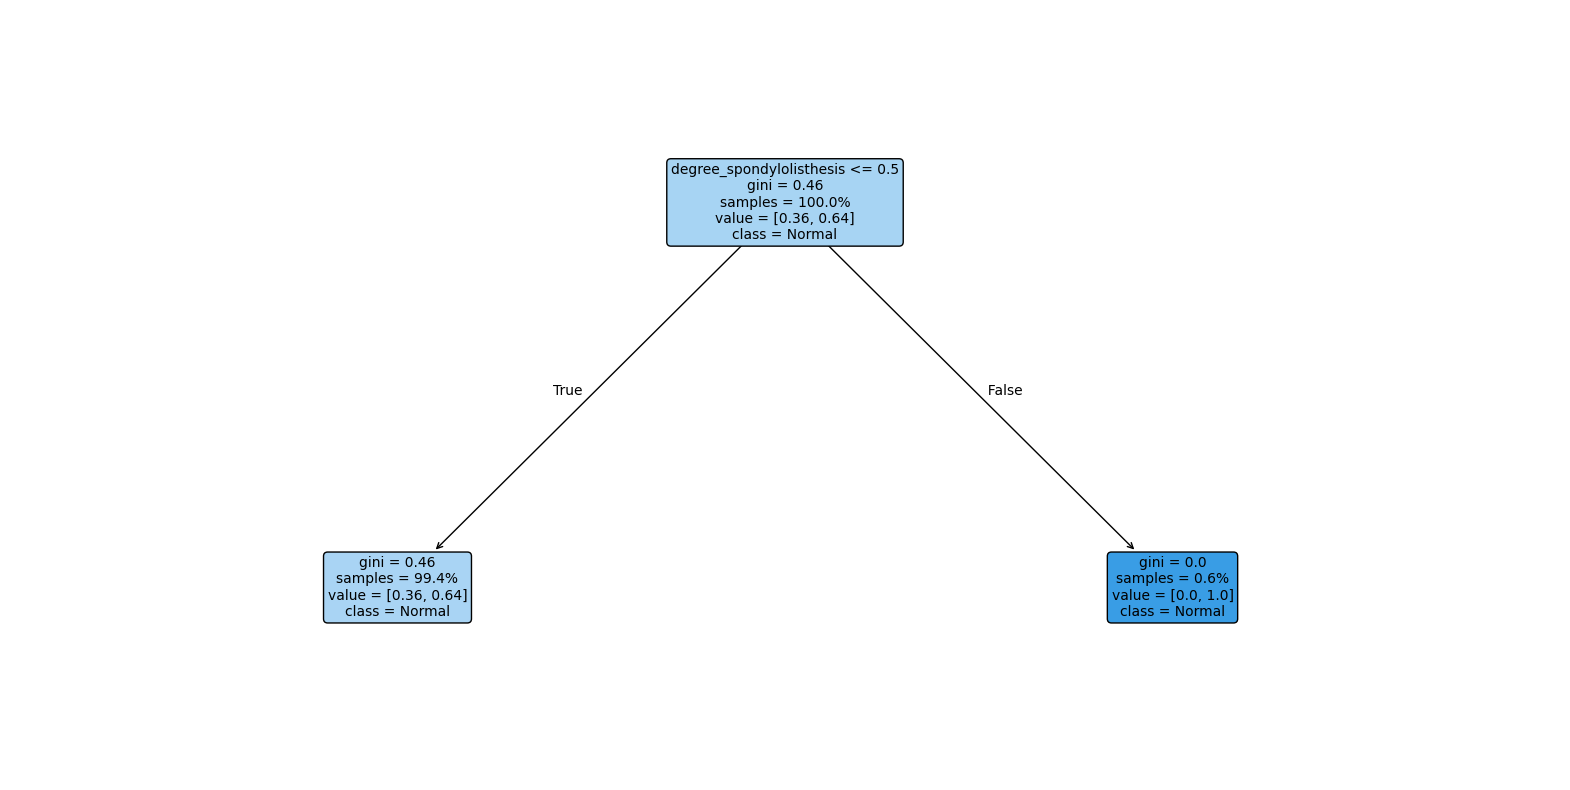

In [9]:
plt.figure(figsize=(20,10))
tree.plot_tree(rf_clf.estimators_[0],#genelde ilk ağaç seçilir,modelin başarısını en çok etkileyen ağaçtır
               filled=True,
               feature_names=X.columns,
               class_names = ["Abnormal","Normal"],
               fontsize=10,
               rounded=True,
               precision=2, 
               label="all", 
               impurity=True, 
               proportion=True 
               )
plt.show()

In [10]:
rf_clf_score = rf_clf.score(x_test,y_test)
print(f"Train Score: {rf_clf_score}")

Train Score: 0.7446808510638298


In [11]:
np.random.seed(0) 
age  = np.random.randint(20,80,30)
blood_peressure = np.random.randint(80,180,30)
cholesterol = np.random.randint(120,350,30)
disease = np.random.randint(0,2,30) 
data = pd.DataFrame({"age":age,"blood_peressure":blood_peressure,"cholesterol":cholesterol,"disease":disease})
data.head(3)

,age,blood_peressure,cholesterol,disease
0,64,89,248,0
1,67,100,284,0
2,73,160,173,1


In [12]:
X = data.drop("disease",axis=1)
y = data["disease"]

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=5,random_state=42)
rf_classifier.fit(X,y)

RandomForestClassifier(n_estimators=5, random_state=42)

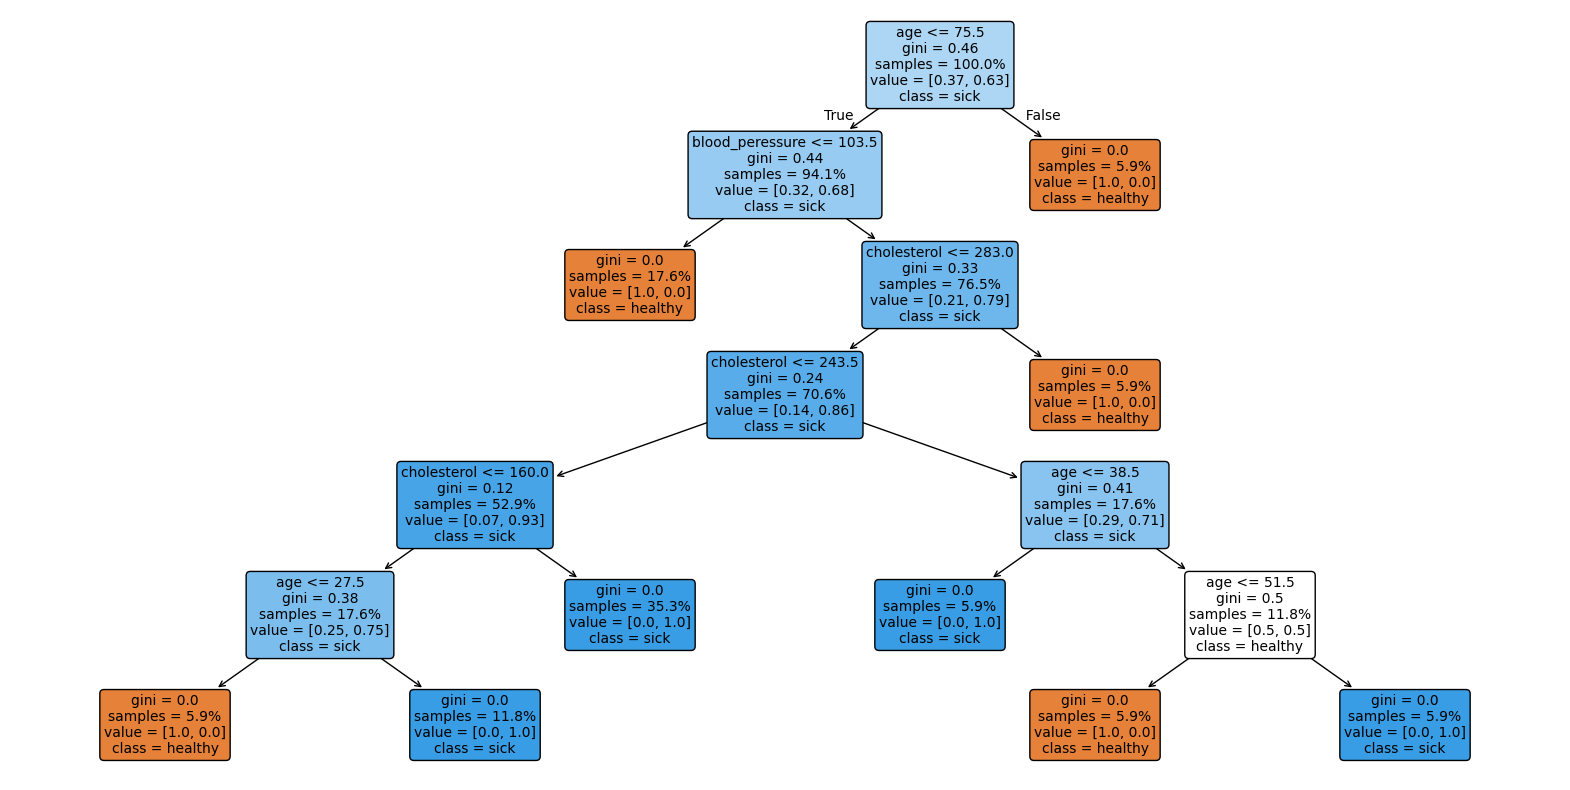

In [14]:
plt.figure(figsize=(20,10))
tree.plot_tree(rf_classifier.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names = ["healthy","sick"],
               fontsize=10,
               rounded=True,
               precision=2, 
               label="all", 
               impurity=True,
               proportion=True 
               )
plt.show()

In [15]:
rf_classifier_score = rf_classifier.score(X,y)
print(f"Train Score: {rf_classifier_score}")

Train Score: 1.0
